# Обработка изображений

Примерно 80% всей осознанной информации человек получает через глаза. Мы __видим__ и запоминаем окружающий мир, разные объекты в нем.  Компьютер отличается от человека, но ему тоже надо как-то хранить и обрабатывать то, что мы видим. Для этого в компьютерах используются __изображения__. Люди придумали много способов (форматов) для хранения изображений, но самый распространенный среди них это RGB-представление.

Для компьютера изображение представляется как набор из __трех__ числовых матриц одинакового размера. Одна отвечает за красный цвет R (red), другая за зеленый G (green)  и третья за синий B (blue).

А как же другие цвета? Этого достаточно. Наш глаз не совершенен, его легко обмануть. Если поместить три источника света - красного, зеленого и синего - очень близко друг к другу, то мы не заметим эти отдельные цвета, а будем видеть один цвет, который зависит от того, в каком соотношении между собой сила света от трех источников. Если они светятся одинаково сильно и максимально ярко - мы увидим белый цвет. Если недостаточно ярко - серый. Если красный и зеленый светятся одинаково сильно и максимально ярко, а синий вообще не светится - мы увидим желтый цвет. Все цвета, доступные глазу, можно получить изменяя яркость свечения этих трех источников - красного, зеленого, синего. Чтобы это сработало источники света должны быть близко друг к другу, посмотрите через лупу на ваш монитор, увидите там много-много таких маленьких, близких источников света (форма и расположение их могут быть разными, главное что они маленькие и близко расположены).

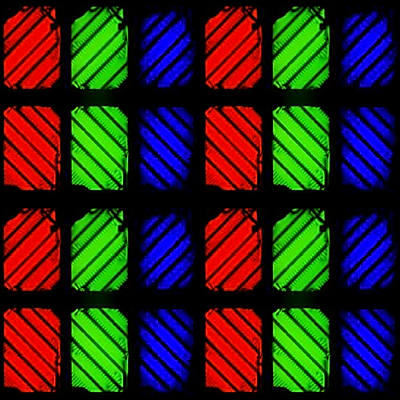

Итак, изображение это набор матриц, отвечающих за силу света трех источников RGB.

Принято, что силу света (значение в матрице) каждого *пикселя* - элемента матрицы - указывают в целых числах от 0 до 255. Часто также используется представление значений в дробном виде в диапазоне (0, 1), если потребуется, мы это отдельно укажем. Всего в таком представлении можно сделать 256 * 256 * 256 = 16 777 216 разных цветов, чего для человека предостаточно.   

Если изображение не цветное, а серое, то все три матрицы будут одинаковыми и достаточно хранить и обрабатывать лишь одну из них.

Сегодня мы будем учиться работать с изображениями. В питоне это можно сделать при помощи разных библиотек. Для начала научимся использовать ту, что считается стандартной.

## 1. Библиотека `PIL` (Python Imaging Library)

Библиотека [`PIL`](https://pillow.readthedocs.io/en/stable/)  (Pillow) предназначена для работы с изображениями, предоставляет множество удобных функций для работы с ними.  Документация

Модуль `Image` этой библиотеки позволяет открывать, обрабатывать и отображать изображения.

Для открытия (чтения с диска) изображения используем команду `open()`, которой указываем путь и название файла.

```img = Image.open('path/to/file.png')```

Отобразить изображение в отдельном окне можно с помощью команды `show()`

*Из-за особенностей работы Jupyter Notebook работа не продолжится, пока вы не закроете окно с изображением.* Если это раздражает - закомментируйте строчки с вызовом функции `.show()`

Подключим библиотеку, откроем изображение и отобразим его.

In [17]:
from pathlib import Path

data_dir = Path('..') / 'data'

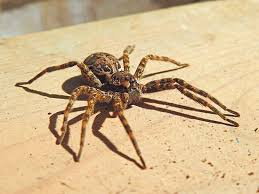

In [18]:
from PIL import Image # подключим библиотеку

image = Image.open(data_dir / 'img.jpg') # откроем изображение
image.show() # отобразим в отдельном окне !!!! НЕ ЗАБУДЬТЕ ЗАКРЫТЬ ОКНО ЧТОБЫ ПРОДОЛЖИТЬ !!!
image # отобразим в ноутбуке

__Разделим__ изображение на 3 части (их еще называют цветовыми каналами), отвечающие за RGB цвета с помощью команды `split()`. Получим три серых изображения.

In [19]:
r, g, b = image.split()

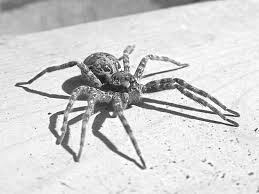

In [20]:
# Красный канал
r.show()
r

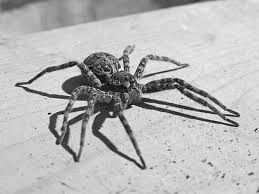

In [21]:
# Зеленый канал
g.show()
g

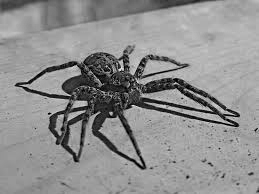

In [22]:
# Синий канал
b.show()
b

Посчитать __гистограмму__ цветов, т.е. сколько пикселей каждого значения (помним что всего возможно 256 разных значений) присутствует в изображении можно командой `histogram()`. Она считает гистограмму отдельно для каждого канала R, G и B. Гистограмма бывает полезной для корректирования цветов.

In [23]:
histogram = image.histogram()
print(len(histogram)) # 768 = 3*256 элементов
histogram # раскомментируйте, если хотите посмотреть на сами числа

768


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 3,
 1,
 0,
 1,
 1,
 2,
 3,
 4,
 1,
 5,
 5,
 1,
 4,
 5,
 4,
 6,
 4,
 3,
 4,
 4,
 9,
 8,
 15,
 6,
 10,
 12,
 11,
 13,
 20,
 17,
 20,
 13,
 14,
 15,
 16,
 19,
 20,
 17,
 25,
 23,
 28,
 23,
 29,
 29,
 29,
 32,
 41,
 42,
 34,
 27,
 40,
 27,
 42,
 44,
 50,
 47,
 57,
 58,
 73,
 70,
 66,
 68,
 74,
 76,
 68,
 80,
 80,
 84,
 90,
 94,
 91,
 96,
 107,
 109,
 93,
 92,
 92,
 90,
 91,
 87,
 89,
 102,
 105,
 106,
 88,
 89,
 82,
 98,
 100,
 75,
 78,
 89,
 89,
 75,
 92,
 82,
 88,
 59,
 75,
 66,
 54,
 84,
 58,
 58,
 56,
 58,
 69,
 68,
 73,
 63,
 49,
 67,
 51,
 57,
 75,
 57,
 50,
 60,
 52,
 47,
 61,
 57,
 61,
 50,
 47,
 70,
 40,
 65,
 50,
 58,
 61,
 62,
 65,
 81,
 80,
 101,
 112,
 121,
 149,
 157,
 154,
 131,
 111,
 123,
 133,
 109,
 140,
 133,
 116,
 115,
 127,
 134,
 125,
 116,
 85,
 135,
 127,
 152,
 126,
 136,
 100,
 116,
 126,
 134,
 113,
 138,
 172,
 94,
 101,
 104,
 83,
 98,
 86,
 77,
 98,
 80,
 74,
 56,
 44,
 39,
 57,
 46,
 51,
 64,



__Узнать информацию__ об изображении, если она есть, можно командой  `_getexif()`

In [24]:
exif = image._getexif() # информация об изображении


Можно __обрезать__ изображение командой `crop()`.

Нужно открыть изображение, после чего вызвать метод `crop()`. Передаем координаты (x,y) углов окошка, которым будем обрезать (x1, y1, x2, y2).

В Pillow первый пиксель (номер 0) расположен верху слева. С увеличением значения x идет смещение вправо. С увеличением значения y идет смещение вниз. Последний пиксель - это правый нижний.

__Сохранить__ изображение можно командой `save()`

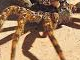

In [25]:
from PIL import Image #

image = Image.open(data_dir / 'img.jpg') # откроем
cropped = image.crop((70, 80, 150, 140)) # обрежем по заданным координатам
cropped.save('img_crop.png') # сохраним
cropped.show() # отобразим
cropped # отобразим

Для быстрого получения нужных координат можно использовать Gimp или Photoshop. Он поможет определить координаты для следующего среза.

__Поворот__ изображения можно сделать командой `rotate()` который возвращает повернутую на заданное число градусов копию изображения.

Конечно, все действия с изображениями можно выполнять только если они открыты, а если вдруг не открылось (нет файла, нет прав доступа...)? Надо проверять результат команды открытия. Если она не может открыть файл, то вернет ошибку IOError (ошибка ввода-вывода из модуля `sys`). Мы можем перехватить эту ошибку с помощью блока
```
try:
...
except
...
```

и если ошибка вдруг произошла, то сделать что-то, сообщить пользователю, корректно выйти из программы. Если мы не предпримем действий, то наша программа просто завершится с ошибкой.

Для Jupyter Notebook это не так важно, он интерактивный и сообщит об ошибке, которую мы можем сразу же исправить. Но если мы пишем отдельную программу, то это нужно учитывать.



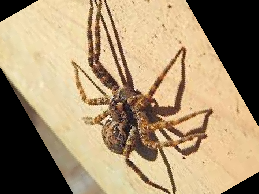

In [26]:
from PIL import Image #
import sys # подключим модуль sys для  команды выхода

try:
    img = Image.open(data_dir / "img.jpg") # выполняем команду открытия внутри блока try, ошибка, если возникнет, будет перехвачена
except IOError: # тип перехватываемой ошибки
    print("Unable to load image") # напечатаем сообщение пользователю о том что произошла ошибка
    sys.exit(1) # и выйдем из программы

# Если же все хорошо, то будут выполняться другие команды
rotated = img.rotate(120) # поворот на заданный угол (в градусах)
rotated.save(data_dir / 'img_rotated.jpg') # сохранение повернутого изображения
rotated.show() # отображение
rotated # отображение

### Загрузка изображения из URL в Pillow

Часто есть необходимость работать с изображением, не хранящееся на компьютере локально, а находящимися в интернет.  

Будем использовать библиотеку `requests` для работы с URL и связи с ним. Библиотека позволяет посылать запросы на сервер и получать ответы от него.

Чтобы указать в каком виде данные получить для изображения указываем `raw` - в чистом виде без всяких модификаций.

Если все хорошо и изображение загружено, то откроем его, и будем обрабатывать дальше.

Давайте загрузим изображение через его URL и сохраним его на диск.

Создаем запрос на загрузку, данные (картинка) загружается в память объекта `resp`,
мы ее открываем как будто это файл, и сохраняем.

Операции, которые могут дать ошибку выполняем в блоке `try`.



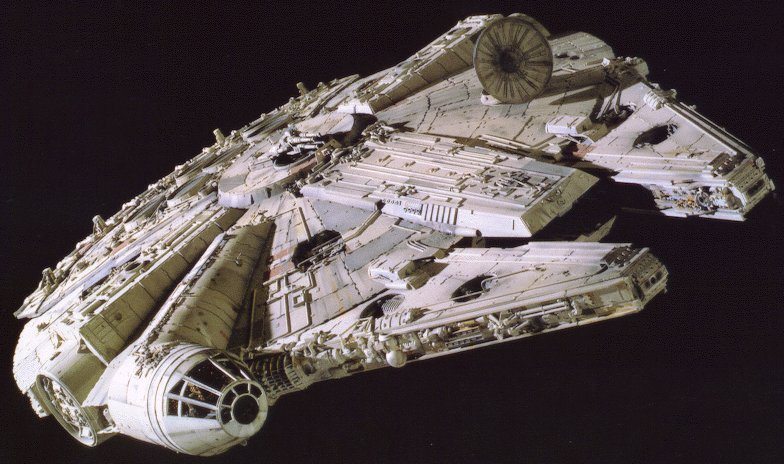

In [27]:
from PIL import Image #
import requests # подключим библиотеку requests
import sys # подключим модуль sys для команды выхода

url = 'https://upload.wikimedia.org/wikipedia/ru/d/dc/Melfal.jpg' # Адрес URL с картинкой
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
try:
    resp = requests.get(url, stream=True,headers=headers).raw # Делаем запрос к серверу с картинкой
except requests.exceptions.RequestException as e:  #
    sys.exit(1) # если вернул ошибку - выходим из программы

try:
    img = Image.open(resp) # Если сервер ошибок не вернул, то пытаемся открыть изображение
except IOError:
    print("Unable to open image") # Если не получилось сообщаем пользователю
    sys.exit(1) # и выходим

img.save(data_dir / 'downloaded_img.jpg', 'jpeg') # Если получилось открыть - сохраняем.
img.show() # отображение
img # отображение

### Рисование в Pillow

У Pillow есть базовые возможности для создания 2D графики. Модуль `ImageDraw` предоставляет простую 2D графику для объектов `Image`. Мы можем создавать новые изображения, аннотации к ним, ретушировать существующие фото, а также генерировать графику для веб.

Для примера создадим новое изображение, на котором нарисован голубой прямоугольник поверх белого фона.

Команда `new()` создает новое изображение, у которого режим «RGBA», размер 200х200 и белый фон.

RGBA это тот же RGB, но добавлен еще канал прозрачности изображения, показывающий будет ли просвечивать другое изображение, которое уже было на месте нашего рисования. Это бывает полезно при наложении нескольких изображений друг на друга.

Для этого изображения создается объект ImageDraw который будет привязан к изображению. Теперь на нем можно что-то нарисовать. Представить можно так: мы взяли изображение и наложили на него прозрачную кальку, на которой теперь можем рисовать.  

С помощью метода `rectangle()` на изображении нарисуем синий прямоугольник указав координаты его углов и цвет, а потом с помощью метода `ellipse()` добавим желтый эллипс, указав координаты углов прямоугольника, в который он вписан и цвет.   

Сохраним и отобразим полученное изображение.



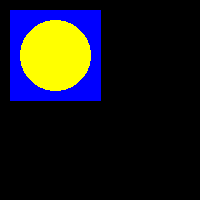

In [28]:
from PIL import Image, ImageDraw

# Создаем изображение - белый квадрат
img = Image.new('RGBA', (200, 200), 'black')  #
idraw = ImageDraw.Draw(img) # создаем объект в котором будем рисовать, пока пустой.

idraw.rectangle((10, 10, 100, 100), fill='blue') # добавляем синий прямоугольник
idraw.ellipse((20, 20, 90, 90), fill='yellow') # добавляем желтый эллипс

img.save(data_dir / 'rectangle.png') # сохраняем
img.show() # отображаем
img # отображаем

Используя такую "кальку" - объекты ImageDraw, мы можем добавлять на изображение разные фигуры (линии, точки, полигоны...), смотри документацию.

Можем добавлять и __текст__.

С помощью метода `text()` мы добавляем текст на изображение.
Ему мы указываем координаты верхнего левого угла, где текст будет расположен, сам текст, который хотим добавить и шрифт, которым текст будет отображен.

Эти аргументы нужно создать заранее, для задания шрифта используем модуль `ImageFont` (не забудем его подключить) и его метод `truetype()` , где указываем название шрифта, его размер.  По умолчанию цвет шрифта белый.

Шрифты truetype хранятся в файлах .ttf . Если на вашем компьютере нет какого-то шрифта, то его всегда можно добавить таким файлом. Мы загрузили шрифт arial в файле arial.ttf

Попробуйте поменять надпись, ее положение.


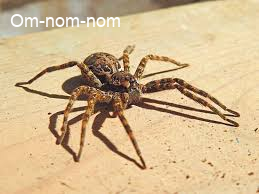

In [29]:
from PIL import Image, ImageDraw, ImageFont # подключаем все библиотеки, не забудем про ImageFont
import sys #

try:
    img = Image.open(data_dir / "img.jpg") # пытаемся открыть изображение
except:
    print("Unable to load image") # не смогли? Сообщаем пользователю
    sys.exit(1) # и выходим

idraw = ImageDraw.Draw(img) # Создаем объект "кальку" для рисования.
text = "Om-nom-nom" # Текст который хотим наложить

font = ImageFont.truetype(data_dir / "arial.ttf", size=18) # Задаем шрифт текста

idraw.text((10, 10), text, font=font) # Накладываем

img.save(data_dir / 'img_watermarked.png') # сохраняем
img.show() # отображаем
img # отображаем

## Фильтры

Pillow позволяет использовать множество различных фильтров - способов обработки -  изображения. Они являются частью модуля `ImageFilter`.

Фильтры в модуле:

 Название фильтра | Значение
 :--- | :---
    BLUR | размытие
    CONTOUR | выделение контуров
    DETAIL | детальность
    EDGE_ENHANCE | очерчивание
    EDGE_ENHANCE_MORE | очерчивание
    EMBOSS | выдавливание
    FIND_EDGES | контур
    SHARPEN | увеличение резкости
    SMOOTH | сглаживание
    SMOOTH_MORE |сглаживание



Давайте рассмотрим несколько примеров использования метода `filter()`, другие изучайте самостоятельно по документации.

__Размытие__ (blur)

Сделаем изображение размытым. Используя метод `filter()` указываем ему какой именно фильтр применить. `ImageFilter.BLUR` - размытие.

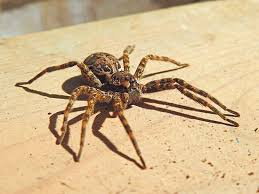

In [30]:
image

In [31]:
from PIL import ImageFilter # подключим модуль с фильтрами
from PIL import Image #

image = Image.open(data_dir / ''img.jpg') # открываем изображение
blurred_img = image.filter(ImageFilter.BLUR) # применяем выбранный фильтр
blurred_img.save(data_dir / 'blurry_img.png') # сохраняем
blurred_img.show() # отображаем
blurred_img # отображаем

SyntaxError: unterminated string literal (detected at line 4) (3853870535.py, line 4)

__Увеличение резкости__  : `ImageFilter.SHARPEN`

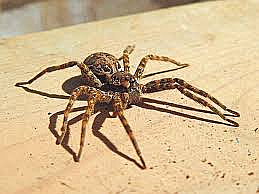

In [ ]:
image = Image.open(data_dir / 'img.jpg')# открываем
sharped_img = image.filter(ImageFilter.SHARPEN) # изменяем
sharped_img.save(data_dir / 'sharper_img.png') # сохраняем
sharped_img.show() # отображаем
sharped_img # отображаем

__Выделение контура__  : `ImageFilter.CONTOUR`

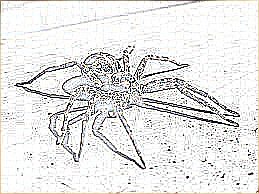

In [ ]:
image = Image.open(data_dir / 'img.jpg')# открываем
contour_img = image.filter(ImageFilter.CONTOUR) # изменяем
contour_img.save(data_dir / 'contour_img.png') # сохраняем
contour_img.show() # отображаем
contour_img # отображаем

Попробуйте самостоятельно применить другие фильтры, посмотрите на результат.

__Изменение размеров__

Метод  `resize()` позволяет изменить размер изображения.
Указываем ему новый размер и тип фильтра, который будет использован для этого.

Фильтры могут быть разными:

Название |	Качество уменьшения |	Качество увеличения | Производительность
 :--- | :--- | :--- | :---
NEAREST  |	| |	  	⭐⭐⭐⭐⭐
BOX 	| ⭐ |	|  	⭐⭐⭐⭐
BILINEAR |	⭐ |	⭐ |	⭐⭐⭐
HAMMING |	⭐⭐| | 	⭐⭐⭐
BICUBIC |	⭐⭐⭐ |	⭐⭐⭐ |	⭐⭐
LANCZOS |	⭐⭐⭐⭐ |	⭐⭐⭐⭐ |	⭐


Попробуйте выполнить разными фильтрами и сравните результаты.

In [ ]:
img.size

(259, 194)

(259, 194)
(100, 50)


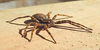

In [ ]:
from PIL import Image

# Меняем размер изображения на новый.
img = Image.open(data_dir / "img.jpg") #
print(img.size)
img = img.resize((100, 50), Image.LANCZOS) # указываем новый размер и тип фильтра
print(img.size)
img.show() #
img #



259 194
680 509


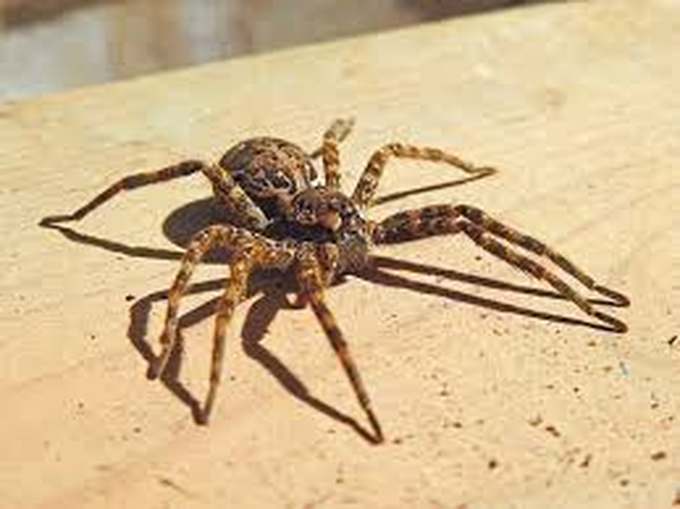

In [ ]:
from PIL import Image

img = Image.open(data_dir / "img.jpg") # открываем
width, height = img.size # узнаем ширину и высоту этого изображения
print(width, height)
new_width  = 680 # зададим новую ширину
new_height = int(new_width * height / width) # пересчитаем какая должна быть новая высота, чтобы не изменилось отношение сторон. Высота - целое число, поэтому int

img = img.resize((new_width, new_height), Image.LANCZOS) # переделаем размеры
img.show() #

width, height = img.size # узнаем ширину и высоту нового изображения
print(width, height)
img #


259 194
907 680


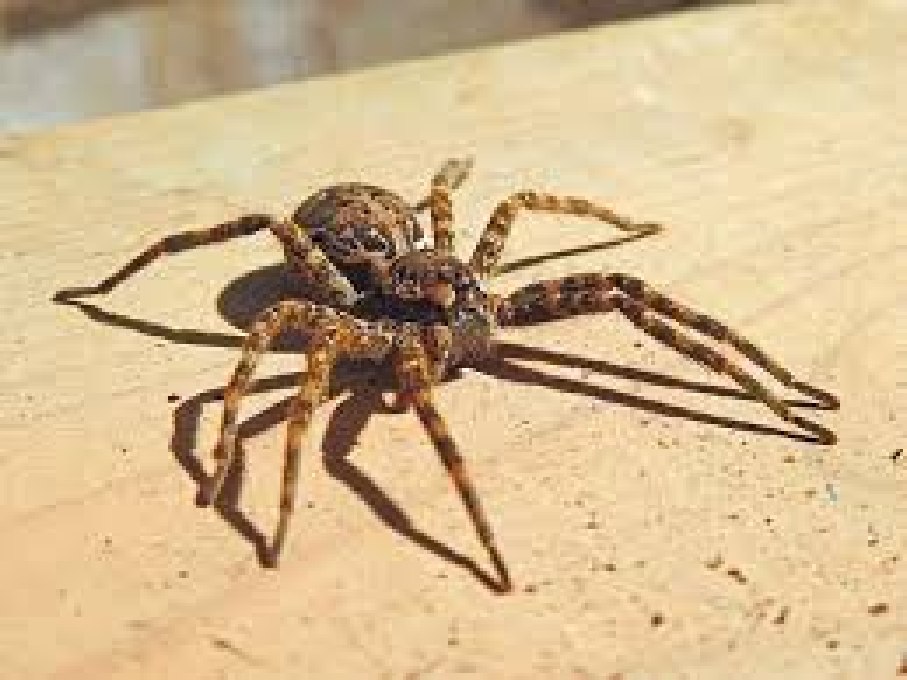

In [ ]:
from PIL import Image

img = Image.open(data_dir / "img.jpg")
width, height = img.size
print(width, height)
new_height = 680 # Новая высота
new_width  = int(new_height * width / height) # посчитаем какая должна быть ширина, чтоб сохранить отношение сторон

#img = img.resize((new_width, new_height), Image.ANTIALIAS) # устарело
img = img.resize((new_width, new_height), Image.NEAREST)
width, height = img.size
print(width, height)
img.show()
img

# Домашнее задание

Изучите документацию на модуль

https://pillow.readthedocs.io/en/stable/reference/Image.html#the-image-class

и попробуйте выполнить другие операции с изображением:

 * Узнайте значение определенного пикселя (`getpixel()`)
 * Переведите изображение в черно-белое представление ( `convert()`)


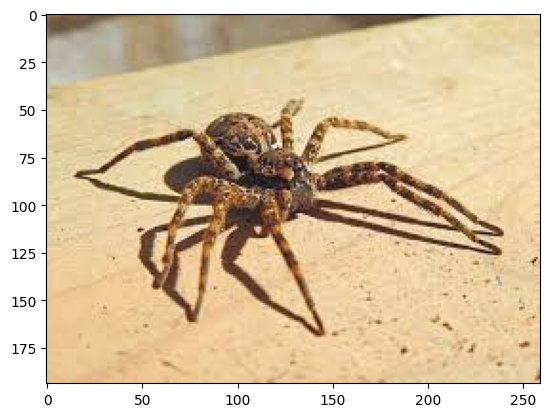

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
im=np.array(image)
plt.imshow(im)